This section gives a brief introduction about the visulization methods of Pandas. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct [link](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k) to the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [10]:
df = pd.read_csv('Dataset\Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133406 entries, 2012-10-03 00:00:00 to 2020-03-25 13:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fremont Bridge Total          133385 non-null  float64
 1   Fremont Bridge East Sidewalk  133385 non-null  float64
 2   Fremont Bridge West Sidewalk  133385 non-null  float64
dtypes: float64(3)
memory usage: 4.1 MB


In [12]:
df.columns = ['Total','East','West']
df.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [13]:
df.describe()

,Total,East,West
count,133385.000000,133385.000000,133385.000000
mean,113.127503,51.644285,61.483218
std,144.370088,66.604699,89.947209
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


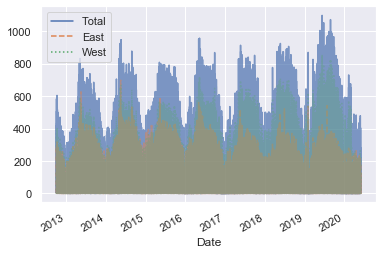

In [17]:
ax = df.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.7)
ax.lines[1].set_alpha(0.5)
ax.lines[2].set_alpha(0.3)


# Data too dense?? -- resample
The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let's resample by week:

Text(0, 0.5, 'Weekly Count')

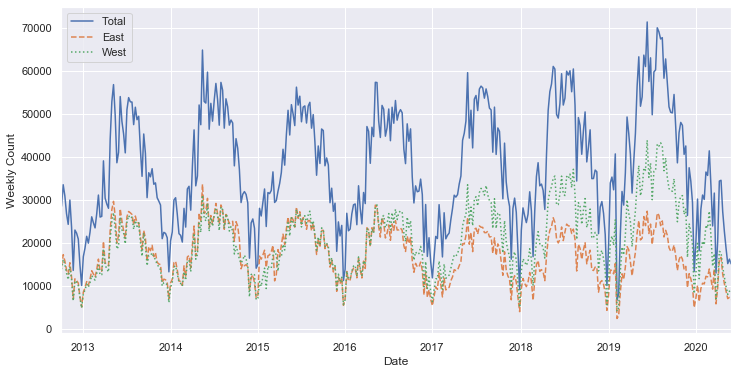

In [22]:
weekly = df.resample('W').sum()
ax = weekly.plot(style=['-','--',':'], figsize=(12,6))
ax.set_ylabel('Weekly Count')

# Date too dense?? -- resample and rolling

In [26]:
daily = df.resample('D').sum()
daily

,Total,East,West
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0
...,...,...,...
2020-05-27,3447.0,1585.0,1862.0
2020-05-28,2805.0,1234.0,1571.0
2020-05-29,3399.0,1554.0,1845.0


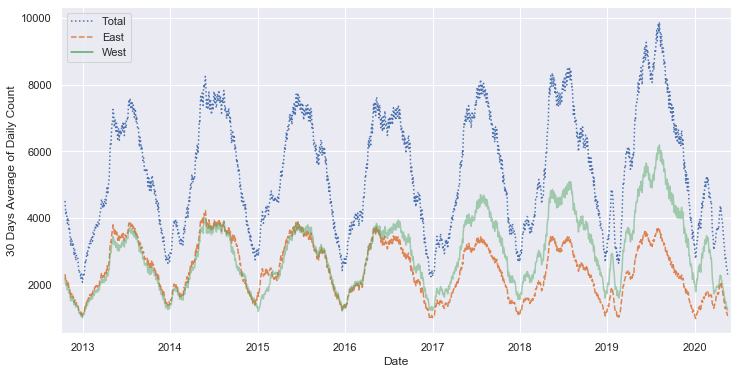

In [32]:
daily_rolling30 = daily.rolling(30, center=True).mean()
ax = daily_rolling30.plot(style=[':', '--', '-'], figsize=(12,6))
ax.set_ylabel('30 Days Average of Daily Count')
ax.lines[2].set_alpha(0.5)

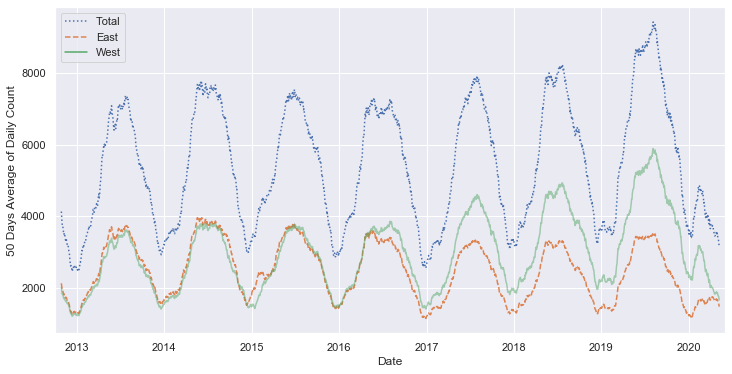

In [33]:
daily_rolling50 = daily.rolling(50, center=True).mean()
ax = daily_rolling50.plot(style=[':', '--', '-'], figsize=(12,6))
ax.set_ylabel('50 Days Average of Daily Count')
ax.lines[2].set_alpha(0.5)

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
# Study of Daily data

In [39]:
df.index.time[:30]

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0),
       datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0)],
      dtype=object)

## Hourly Average

In [40]:
df_hourly = df.groupby(df.index.time).mean()

In [50]:
hourly_ticks = 4 * 60 * 60 * np.arange(12)
hourly_ticks

array([    0,  7200, 14400, 21600, 28800, 36000, 43200, 50400, 57600,
       64800, 72000, 79200])

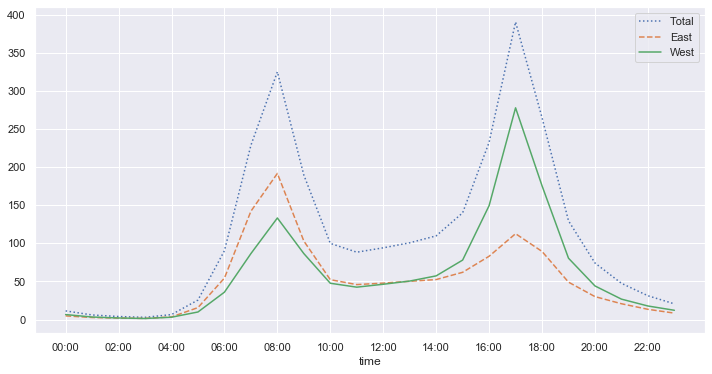

In [52]:
df_hourly.plot(xticks=hourly_ticks, style=[':', '--', '-'],figsize=(12,6))

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

## Weekday Average

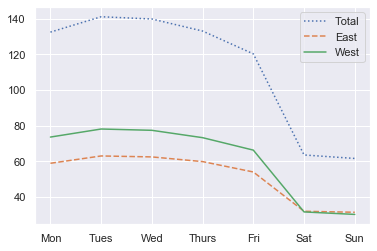

In [56]:
df_weekday = df.groupby(df.index.dayofweek).mean()
df_weekday.index=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday.plot(style=[':', '--', '-'])

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

### Set index too two levels Weekday and Weekends, hourly

In [58]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [59]:
by_time = df.groupby([weekend, df.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    9.522538    4.086880    5.435659
        01:00:00    4.718711    2.122639    2.596072
        02:00:00    3.142533    1.548728    1.593805
        03:00:00    2.700076    1.406447    1.293629
        04:00:00    7.577436    4.201209    3.376228
        05:00:00   32.960967   20.407706   12.553261
        06:00:00  119.772350   73.032234   46.740116
        07:00:00  307.298665  192.358600  114.940065
        08:00:00  431.205993  256.010073  175.195920
        09:00:00  232.970773  127.257999  105.712774
        10:00:00  100.219451   52.092467   48.126984
        11:00:00   75.790879   39.281431   36.509448
        12:00:00   78.467624   39.464601   39.003023
        13:00:00   84.898262   41.632083   43.266180
        14:00:00   96.473300   44.215365   52.257935
        15:00:00  139.426448   57.985139   81.441310
        16:00:00  273.404030   89.871033  183.532997
        17:00:00  503.468010  136.074559  367.393451
        18:00:00  337.644081  108.383123  229.260957
        19:00:00  159.097229   57.691688  101.405542
        20:00:00   87.630479   34.457179   53.173300
        21:00:00   55.026700   23.669773   31.356927
        22:00:00   34.991184   14.886902   20.104282
        23:00:00   21.928212    8.951637   12.976574
Weekend 00:00:00   16.009446    6.679471    9.329975
        01:00:00    9.303526    4.145466    5.158060
        02:00:00    6.046984    2.801270    3.245714
        03:00:00    3.465995    1.736776    1.729219
        04:00:00    3.865869    1.591940    2.273929
        05:00:00    7.306045    3.914987    3.391058
        06:00:00   16.884761    7.945844    8.938917
        07:00:00   32.248111   16.692695   15.555416
        08:00:00   59.770151   31.233627   28.536524
        09:00:00   81.347607   42.547859   38.799748
        10:00:00   99.345088   52.935768   46.409320
        11:00:00  119.963476   62.448992   57.514484
        12:00:00  133.313602   68.698992   64.614610
        13:00:00  140.397985   71.707809   68.690176
        14:00:00  143.226700   73.175063   70.051637
        15:00:00  141.631612   72.066121   69.565491
        16:00:00  130.562972   66.112091   64.450882
        17:00:00  108.318010   54.239295   54.078715
        18:00:00   83.227960   41.889169   41.338791
        19:00:00   55.925693   27.628463   28.297229
        20:00:00   40.728589   19.257557   21.471033
        21:00:00   28.945844   13.506297   15.439547
        22:00:00   21.923804    9.855793   12.068010
        23:00:00   17.336272    7.166877   10.169395

In [62]:
by_time.loc['Weekday']

,Total,East,West
00:00:00,9.522538,4.086880,5.435659
01:00:00,4.718711,2.122639,2.596072
02:00:00,3.142533,1.548728,1.593805
03:00:00,2.700076,1.406447,1.293629
04:00:00,7.577436,4.201209,3.376228
05:00:00,32.960967,20.407706,12.553261
06:00:00,119.772350,73.032234,46.740116
07:00:00,307.298665,192.358600,114.940065
08:00:00,431.205993,256.010073,175.195920
09:00:00,232.970773,127.257999,105.712774


Text(0, 0.5, 'HourlyCount')

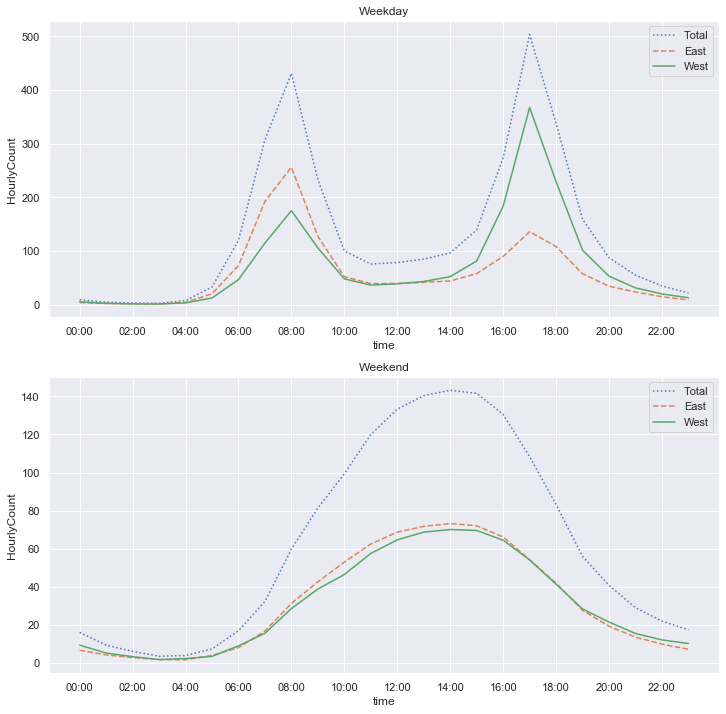

In [66]:
fig, ax = plt.subplots(2, 1, sharex=False,figsize=(12, 12))
ax1 = by_time.loc['Weekday'].plot(ax = ax[0], title='Weekday', xticks=hourly_ticks, style=[':', '--','-'])
ax1.set_ylabel('HourlyCount')
ax2 = by_time.loc['Weekend'].plot(ax = ax[1], title='Weekend', xticks=hourly_ticks, style=[':', '--','-'])
ax2.set_ylabel('HourlyCount')

